In [200]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt

In [174]:
w = torch.tensor(2.0,requires_grad=True)
b = torch.tensor(4.0,requires_grad=True)
def forward(x):
    y = b + 2*x
    return y
x = torch.tensor([3,2])
forward(x)

tensor([10.,  8.], grad_fn=<AddBackward0>)

In [175]:
w = torch.tensor(2.0,requires_grad=True)
b = torch.tensor(4.0,requires_grad=True)
def forward(x):
    y = b + 2*x
    return y
x = torch.tensor([[3,2],[5,6]])
forward(x)

tensor([[10.,  8.],
        [14., 16.]], grad_fn=<AddBackward0>)

In [176]:
torch.manual_seed(1)
model = Linear(in_features=1,out_features=1) #we will use 1 input as x and 1 output as y
x = torch.tensor([[9],[5]],dtype=torch.float32)
y = model(x)
print(list(model.parameters()))
print(y)

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
tensor([[4.1960],
        [2.1349]], grad_fn=<AddmmBackward>)


In [177]:
class LinearRegression(nn.Module):
    def __init__(self,in_size,out_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(in_size,out_size)
    def forward(self,x):
        out = self.linear(x)
        return out

In [178]:
model = LinearRegression(1,1)
model.state_dict()['linear.weight'].data[0] = torch.tensor([4])
model.state_dict()['linear.bias'].data[0] = torch.tensor([8])
model.state_dict()
x = torch.tensor([9],dtype=torch.float32)
y = model(x)
print(y)

tensor([44.], grad_fn=<AddBackward0>)


In [179]:
print("Python dictionary: ",model.state_dict())
print("keys: ",model.state_dict().keys())
print("values: ",model.state_dict().values())

Python dictionary:  OrderedDict([('linear.weight', tensor([[4.]])), ('linear.bias', tensor([8.]))])
keys:  odict_keys(['linear.weight', 'linear.bias'])
values:  odict_values([tensor([[4.]]), tensor([8.])])


In [180]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        print(Loss_function)
        print(len(Loss_function))
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

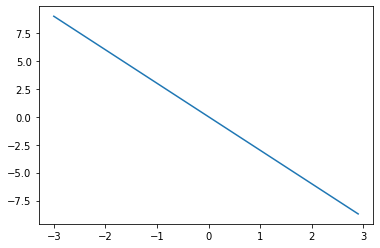

In [181]:
X = torch.arange(-3,3,0.1).view(-1,1)
y = -3*X
plt.plot(X.numpy(),y.numpy())

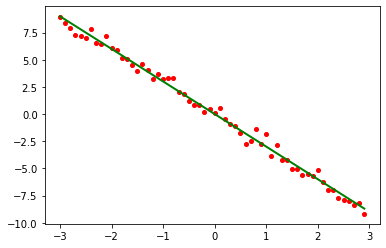

In [182]:
#add a noise into y
Y = y + 0.5*torch.randn(X.size())
plt.plot(X.numpy(),Y.numpy(),'ro',label = 'Y',markersize=4)
plt.plot(X.numpy(),y.numpy(),label = 'y',linewidth=2,color='g')

In [183]:
# Create forward function for prediction
def forward(x):
    return w*x
# Create the MSE function for evaluate the result.
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

In [184]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []
w = torch.tensor(-10.0, requires_grad = True)

In [185]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

[tensor(146.8617, grad_fn=<MeanBackward0>), tensor(107.8728, grad_fn=<MeanBackward0>), tensor(74.8873, grad_fn=<MeanBackward0>), tensor(47.9050, grad_fn=<MeanBackward0>), tensor(26.9261, grad_fn=<MeanBackward0>), tensor(11.9506, grad_fn=<MeanBackward0>), tensor(2.9784, grad_fn=<MeanBackward0>), tensor(0.0095, grad_fn=<MeanBackward0>), tensor(3.0439, grad_fn=<MeanBackward0>), tensor(12.0817, grad_fn=<MeanBackward0>), tensor(27.1228, grad_fn=<MeanBackward0>), tensor(48.1672, grad_fn=<MeanBackward0>), tensor(75.2150, grad_fn=<MeanBackward0>), tensor(108.2661, grad_fn=<MeanBackward0>), tensor(147.3205, grad_fn=<MeanBackward0>)]
15


In [186]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

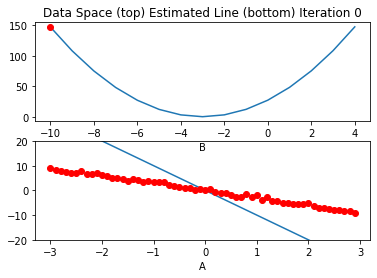

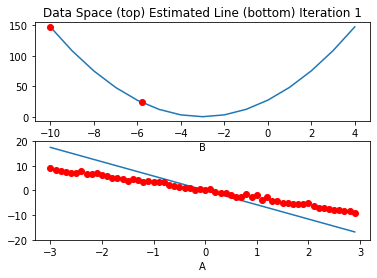

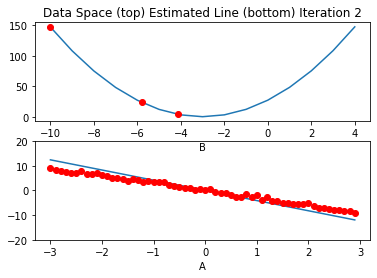

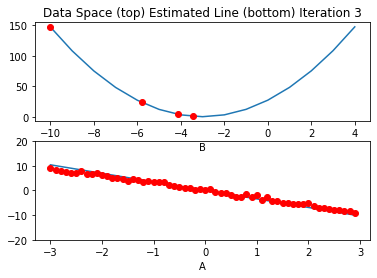

<Figure size 432x288 with 0 Axes>

In [187]:
# Give 4 iterations for training the model here.

train_model(4)

Text(24.0, 0.5, 'Cost')

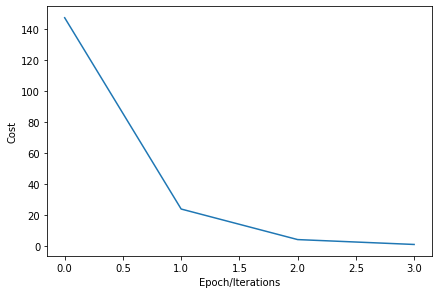

In [188]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [189]:
torch.arange(-10,5)

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4])

In [190]:
gradient_plot.Loss_function

[tensor(147.1383, grad_fn=<MeanBackward0>),
 tensor(108.1395, grad_fn=<MeanBackward0>),
 tensor(75.1441, grad_fn=<MeanBackward0>),
 tensor(48.1520, grad_fn=<MeanBackward0>),
 tensor(27.1632, grad_fn=<MeanBackward0>),
 tensor(12.1777, grad_fn=<MeanBackward0>),
 tensor(3.1956, grad_fn=<MeanBackward0>),
 tensor(0.2168, grad_fn=<MeanBackward0>),
 tensor(3.2414, grad_fn=<MeanBackward0>),
 tensor(12.2693, grad_fn=<MeanBackward0>),
 tensor(27.3005, grad_fn=<MeanBackward0>),
 tensor(48.3351, grad_fn=<MeanBackward0>),
 tensor(75.3729, grad_fn=<MeanBackward0>),
 tensor(108.4142, grad_fn=<MeanBackward0>),
 tensor(147.4587, grad_fn=<MeanBackward0>)]

In [191]:
for i in gradient_plot.parameter_values:
    print(i)

tensor(-10.)
tensor(-9.)
tensor(-8.)
tensor(-7.)
tensor(-6.)
tensor(-5.)
tensor(-4.)
tensor(-3.)
tensor(-2.)
tensor(-1.)
tensor(0.)
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)


In [192]:
criterian(forward(X),Y)

tensor(0.3124, grad_fn=<MeanBackward0>)

In [193]:
forward(X)

tensor([[ 9.5470e+00],
        [ 9.2287e+00],
        [ 8.9105e+00],
        [ 8.5923e+00],
        [ 8.2740e+00],
        [ 7.9558e+00],
        [ 7.6376e+00],
        [ 7.3193e+00],
        [ 7.0011e+00],
        [ 6.6829e+00],
        [ 6.3646e+00],
        [ 6.0464e+00],
        [ 5.7282e+00],
        [ 5.4099e+00],
        [ 5.0917e+00],
        [ 4.7735e+00],
        [ 4.4552e+00],
        [ 4.1370e+00],
        [ 3.8188e+00],
        [ 3.5006e+00],
        [ 3.1823e+00],
        [ 2.8641e+00],
        [ 2.5459e+00],
        [ 2.2276e+00],
        [ 1.9094e+00],
        [ 1.5912e+00],
        [ 1.2729e+00],
        [ 9.5470e-01],
        [ 6.3646e-01],
        [ 3.1823e-01],
        [ 7.5872e-08],
        [-3.1823e-01],
        [-6.3646e-01],
        [-9.5470e-01],
        [-1.2729e+00],
        [-1.5912e+00],
        [-1.9094e+00],
        [-2.2276e+00],
        [-2.5459e+00],
        [-2.8641e+00],
        [-3.1823e+00],
        [-3.5006e+00],
        [-3.8188e+00],
        [-4

In [194]:
gradient_plot.error

[147.13827514648438, 23.685070037841797, 3.965461492538452, 0.815581738948822]

In [195]:
gradient_plot.parameter

[tensor(-10.), tensor(-5.8000), tensor(-4.1213), tensor(-3.4504)]

In [196]:
for i in gradient_plot.parameter_values:
    print(i)

tensor(-10.)
tensor(-9.)
tensor(-8.)
tensor(-7.)
tensor(-6.)
tensor(-5.)
tensor(-4.)
tensor(-3.)
tensor(-2.)
tensor(-1.)
tensor(0.)
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)


In [197]:
w.data

tensor(-3.1823)

# 2 Parameter bias and weight

In [211]:
from mpl_toolkits import mplot3d
import numpy as np

In [212]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [213]:
# Create f(X) with a slope of 1 and a bias of -1

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1

In [214]:
# Add noise

Y = f + 0.1 * torch.randn(X.size())

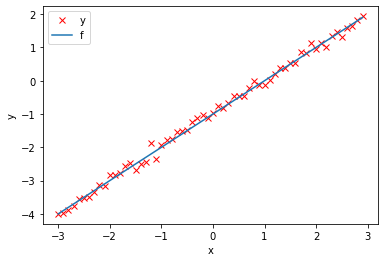

In [215]:
# Plot out the line and the points with noise

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [216]:
# Define the forward function

def forward(x):
    return w * x + b

In [217]:
# Define the MSE Loss function

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

<Figure size 432x288 with 0 Axes>

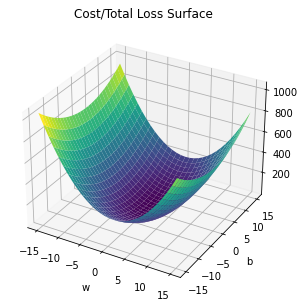

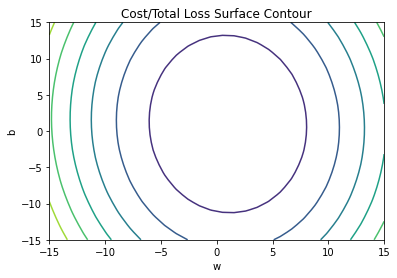

In [218]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 15, X, Y, 30)

In [219]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [220]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS = []

In [221]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        # store the loss in the list LOSS
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

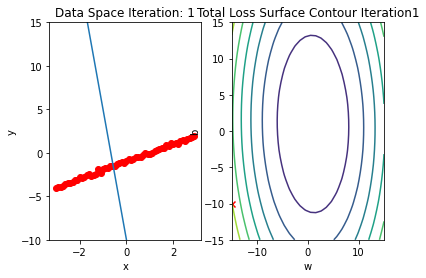

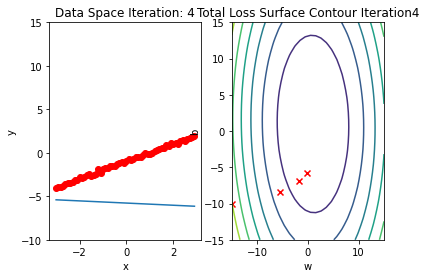

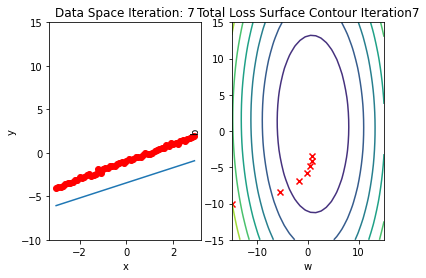

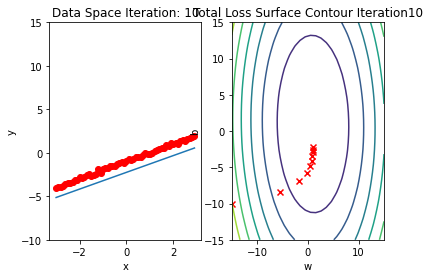

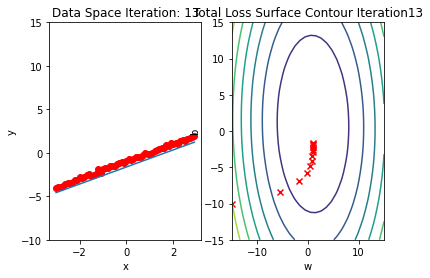

In [222]:
# Train the model with 15 iterations

train_model(15)

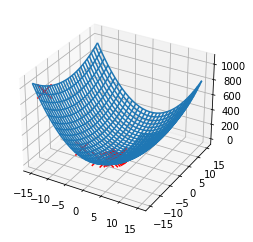

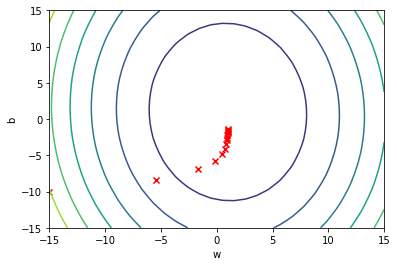

Text(24.125, 0.5, 'Cost')

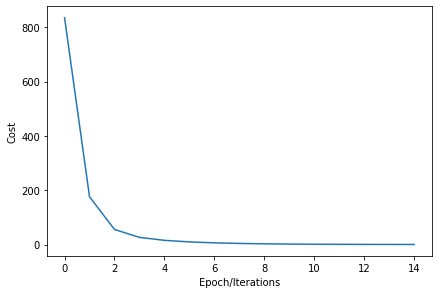

In [223]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")